In [29]:
import cv2
import numpy as np
from PIL import Image

def smooth_image(image):
    return cv2.blur(image, (5, 5))

def sharpen_image(image):
    kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    return cv2.filter2D(image, -1, kernel)

def rotate_image(image, angle):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(image, matrix, (w, h))

def edge_detection(image):
    return cv2.Canny(image, 100, 200)

def gradient_image(image):
    grad_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    grad_mag = cv2.magnitude(grad_x, grad_y)
    return np.uint8(grad_mag)

def grayscale_image(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def compress_image(image):
    encode_param = [int(cv2.IMWRITE_JPEG_QUALITY), 90]
    _, enc_img = cv2.imencode('.jpg', image, encode_param)
    return cv2.imdecode(enc_img, 1)

def gaussian_blur(image):
    return cv2.GaussianBlur(image, (5, 5), 0)

def median_blur(image):
    return cv2.medianBlur(image, 5)

def kmeans_segmentation(image, k=2):
    pixel_values = image.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    centers = np.uint8(centers)
    segmented_image = centers[labels.flatten()]
    return segmented_image.reshape(image.shape)

def remove_background(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, threshold = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY)
    return cv2.bitwise_and(image, image, mask=threshold)
    
def white_to_pink(image):
    # Define the range for white color (close to 255 in all channels)
    lower_white = np.array([200, 200, 200])  
    upper_white = np.array([255, 255, 255])  
    
    # Create a mask for all white pixels
    white_mask = cv2.inRange(image, lower_white, upper_white)
    
    # Define the pink color (R, G, B)
    pink_color = [255, 105, 180]
    
    # Replace all white pixels with pink
    image[white_mask > 0] = pink_color
    
    return image

def flip_image(image, direction='horizontal'):
    if direction == 'horizontal':
        flipped_image = cv2.flip(image, 1)  # 1 is for horizontal flip
    elif direction == 'vertical':
        flipped_image = cv2.flip(image, 0)  # 0 is for vertical flip
    return flipped_image


In [3]:
bird_path = '/kaggle/input/imgfil/birds.jpg'
image = cv2.imread(bird_path)

In [13]:
road_path ='/kaggle/input/imgfil/task2.jpg'
image2 = cv2.imread(road_path)
image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

In [24]:
ba_path ='//kaggle/input/banana2/ba.jpg'
image3 = cv2.imread(ba_path)
image3_rgb = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)

In [4]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [5]:
import matplotlib.pyplot as plt
def display_images(original, processed, title_original="Original Image", title_processed="Processed Image"):
    # Plotting side-by-side
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    axs[0].imshow(original)
    axs[0].set_title(title_original)
    axs[0].axis('off')  
    axs[1].imshow(processed)
    axs[1].set_title(title_processed)
    axs[1].axis('off')  
    plt.show()

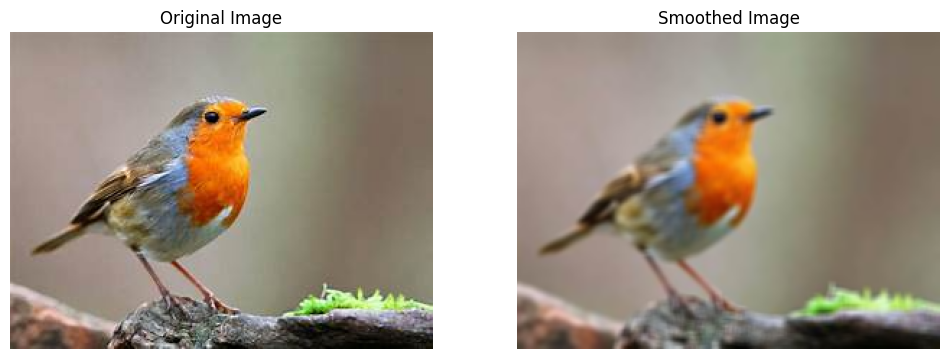

In [8]:
# Apply smoothing function
smoothed_image = smooth_image(image)

# Display original and smoothed images side by side
display_images(image_rgb, cv2.cvtColor(smoothed_image, cv2.COLOR_BGR2RGB), "Original Image", "Smoothed Image")

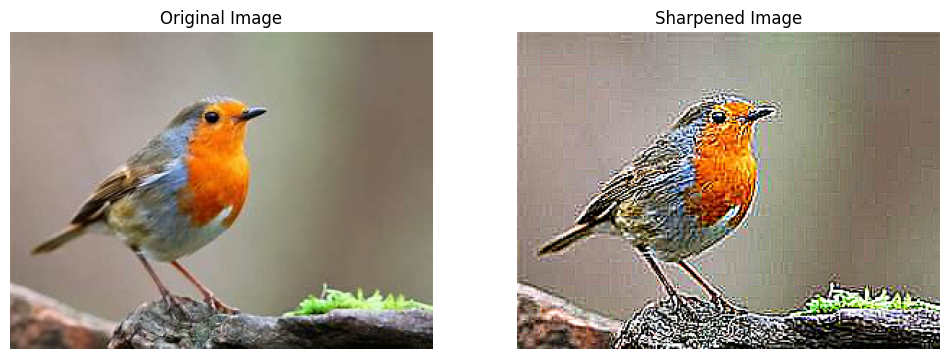

In [7]:
# Apply sharpening function
sharpened_image = sharpen_image(image)

# Display original and sharpened images side by side
display_images(image_rgb, cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB), "Original Image", "Sharpened Image")


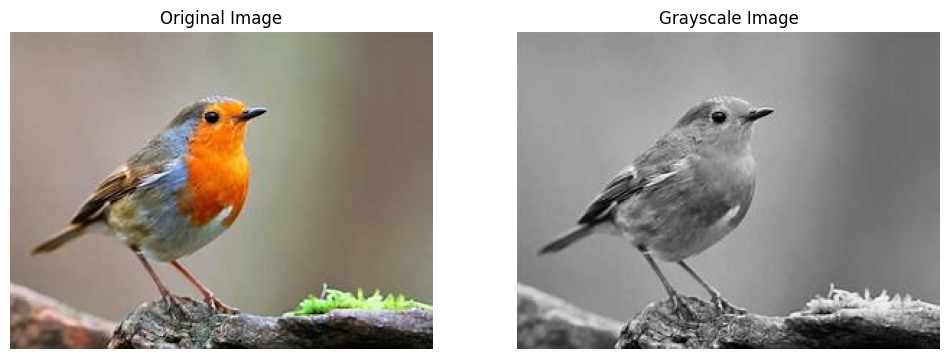

In [20]:
# Apply grayscale conversion function
grayscale_image = grayscale_image(image)

# Display original and grayscale images side by side
display_images(image_rgb, grayscale_image, "Original Image", "Grayscale Image")


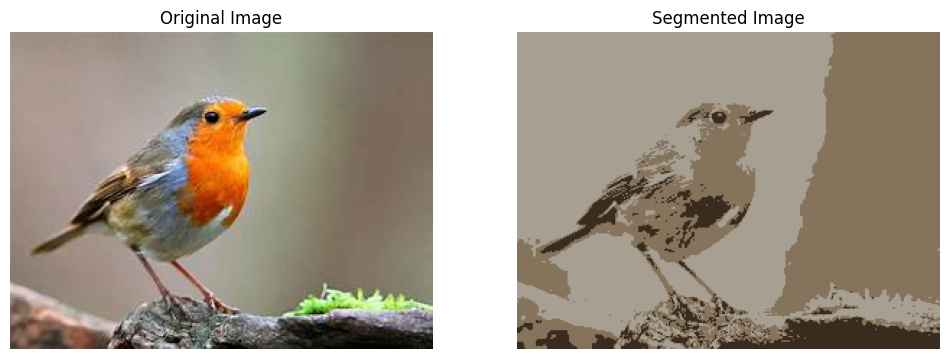

In [11]:
# Apply K-means segmentation function
segmented_image = kmeans_segmentation(image, k=3)

# Display original and segmented images side by side
display_images(image_rgb, cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB), "Original Image", "Segmented Image")


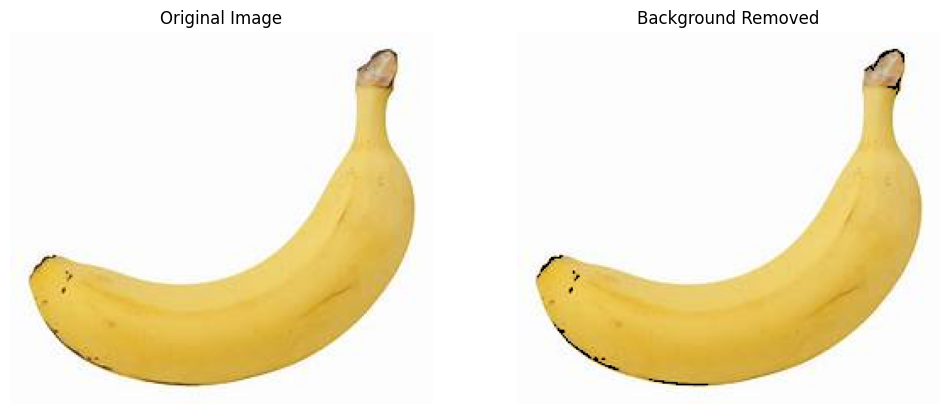

In [25]:
# Apply background removal function
background_removed_image = remove_background(image3)

# Display original and background removed images side by side
display_images(image3_rgb, cv2.cvtColor(background_removed_image, cv2.COLOR_BGR2RGB), "Original Image", "Background Removed")


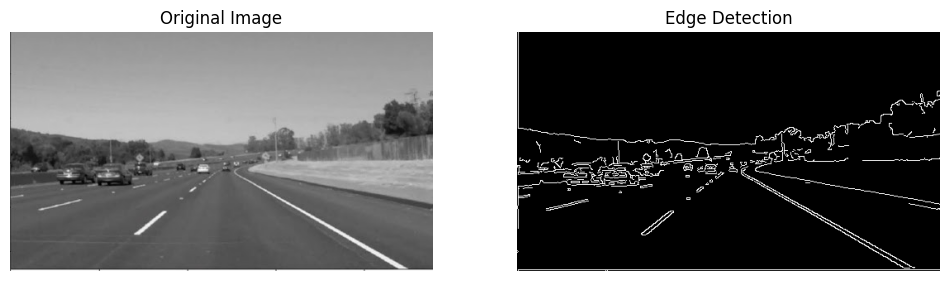

In [14]:
# Apply edge detection function
edges_image = edge_detection(image2)

# Display original and edge detected images side by side
display_images(image2_rgb, cv2.cvtColor(edges_image, cv2.COLOR_BGR2RGB), "Original Image", "Edge Detection")


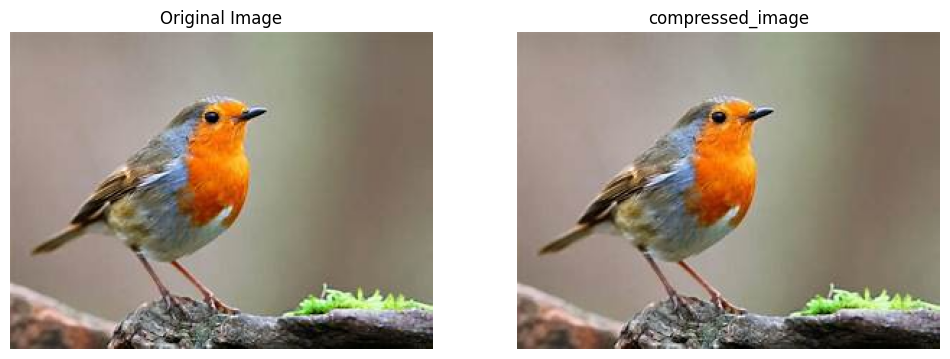

In [21]:
# Apply edge detection function
compressed_image = compress_image(image)

# Display original and edge detected images side by side
display_images(image_rgb, cv2.cvtColor(compressed_image, cv2.COLOR_BGR2RGB), "Original Image", "compressed_image")


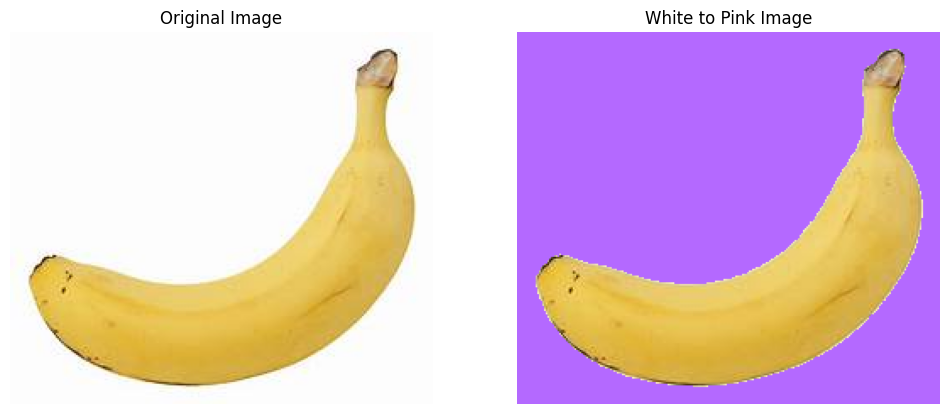

In [27]:
# Apply the white to pink function
pink_image = white_to_pink(image3)

# Convert the result to RGB for displaying
pink_image_rgb = cv2.cvtColor(pink_image, cv2.COLOR_BGR2RGB)

# Display original and modified images side by side
display_images(image3_rgb, pink_image_rgb, "Original Image", "White to Pink Image")

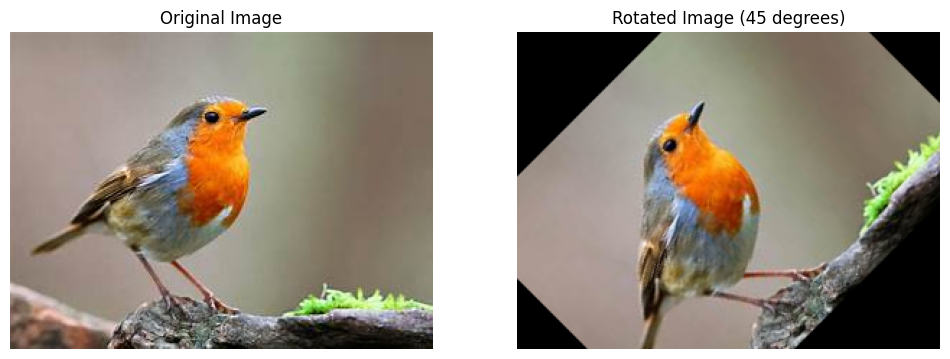

In [28]:
# Rotate the image by 45
rotated_image = rotate_image(image, 45)

# Convert the rotated image to RGB for displaying
rotated_image_rgb = cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB)

# Display original and rotated images side by side
display_images(image_rgb, rotated_image_rgb, "Original Image", "Rotated Image (45 degrees)")

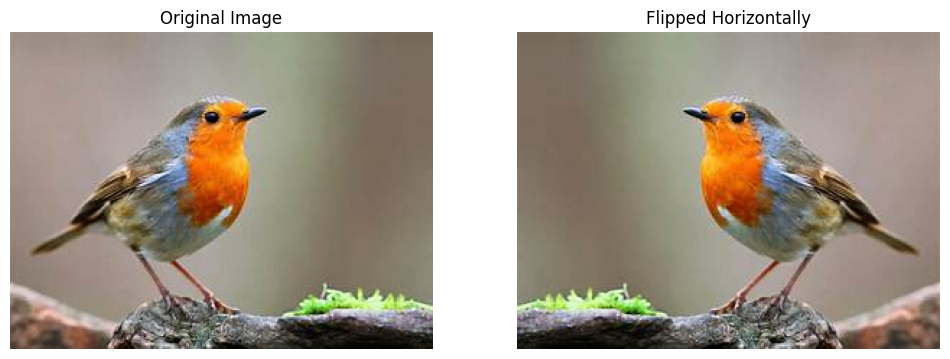

In [32]:
# Flip the image horizontally
flipped_horizontally = flip_image(image, 'horizontal')
flipped_horizontally_rgb = cv2.cvtColor(flipped_horizontally, cv2.COLOR_BGR2RGB)
# Display the images side-by-side
display_images(image_rgb, flipped_horizontally_rgb, "Original Image", "Flipped Horizontally")